Mutivariate Regression Analysis
Videos can be found at: https://www.youtube.com/channel/UCBsTB02yO0QGwtlfiv5m25Q

Import our Libraries
The first thing we need to do is import the libraries we will be using in this tutorial. To visualize our data, we will be using matplotlib and seaborn to create heatmaps and a scatter matrix. To build our model, we will be using the sklearn library, and the evaluation will be taking place with the statsmodels library. I've also added a few additional modules to help calculate certain metrics.

In [9]:
#import packages
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from scipy.stats import linregress

import statsmodels.api as sm
from statsmodels.stats import diagnostic as diag
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

%matplotlib inline

In [4]:
#load team data
team_data = pd.read_csv('teamstats.csv')
team_data.head()

,Team Name,Blocked Shots,Goals Against,Penalties,Shots,Hits,PK Goals Allows/Min,FO %
0,ANA,2429,459,674,4745,3849,0.063244,51.310547
1,ARI,2484,471,558,4971,4027,0.063042,47.809408
2,BOS,2122,424,641,5380,3790,0.055314,50.736035
3,BUF,2085,547,600,5253,3332,0.050352,49.739769
4,CAR,2050,475,524,5602,3670,0.075586,51.505222


In [5]:
# make sure columns are floats
cols = team_data.columns.drop('Team Name')
team_data[cols] = team_data[cols].astype(float)

# set the index to the team column
team_data = team_data.set_index('Team Name')
team_data.head()

,Blocked Shots,Goals Against,Penalties,Shots,Hits,PK Goals Allows/Min,FO %
Team Name,,,,,,,
ANA,2429.0,459.0,674.0,4745.0,3849.0,0.063244,51.310547
ARI,2484.0,471.0,558.0,4971.0,4027.0,0.063042,47.809408
BOS,2122.0,424.0,641.0,5380.0,3790.0,0.055314,50.736035
BUF,2085.0,547.0,600.0,5253.0,3332.0,0.050352,49.739769
CAR,2050.0,475.0,524.0,5602.0,3670.0,0.075586,51.505222


,Blocked Shots,Goals Against,Penalties,Shots,Hits,PK Goals Allows/Min,FO %
Blocked Shots,1.000000,0.147120,0.063097,-0.502159,0.232564,0.304377,-0.288227
Goals Against,0.147120,1.000000,-0.192716,-0.185152,-0.034409,0.210878,-0.314922
Penalties,0.063097,-0.192716,1.000000,-0.214891,0.100498,-0.443474,-0.067966
Shots,-0.502159,-0.185152,-0.214891,1.000000,-0.132821,-0.164925,0.290889
Hits,0.232564,-0.034409,0.100498,-0.132821,1.000000,0.115664,-0.277854
PK Goals Allows/Min,0.304377,0.210878,-0.443474,-0.164925,0.115664,1.000000,-0.070813
FO %,-0.288227,-0.314922,-0.067966,0.290889,-0.277854,-0.070813,1.000000


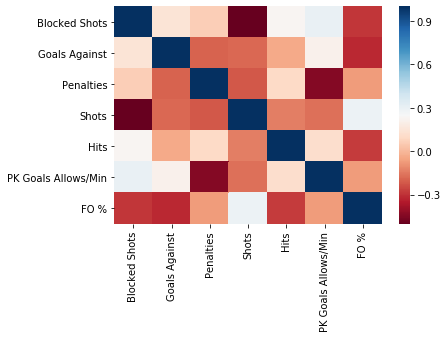

In [6]:
# avoid multicolinearity (where explanatory varibales are too correlated)
# calculate the correlation matrix
corr = team_data.corr()

# display the correlation matrix
display(corr)

# plot the correlation heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap='RdBu')

#dark red and dark blue indicate highly correlated variables

In [21]:
#remove variables with high multicolinearity 
#blocked shots is obviously dependent on shots faced and pk goals allowed is dependent on penalties committed
team_data = team_data.drop(['Blocked Shots', 'PK Goals Allows/Min'], axis = 1)
team_data.head()

,Goals Against,Penalties,Shots,Hits,FO %
Team Name,,,,,
ANA,459.0,674.0,4745.0,3849.0,51.310547
ARI,471.0,558.0,4971.0,4027.0,47.809408
BOS,424.0,641.0,5380.0,3790.0,50.736035
BUF,547.0,600.0,5253.0,3332.0,49.739769
CAR,475.0,524.0,5602.0,3670.0,51.505222


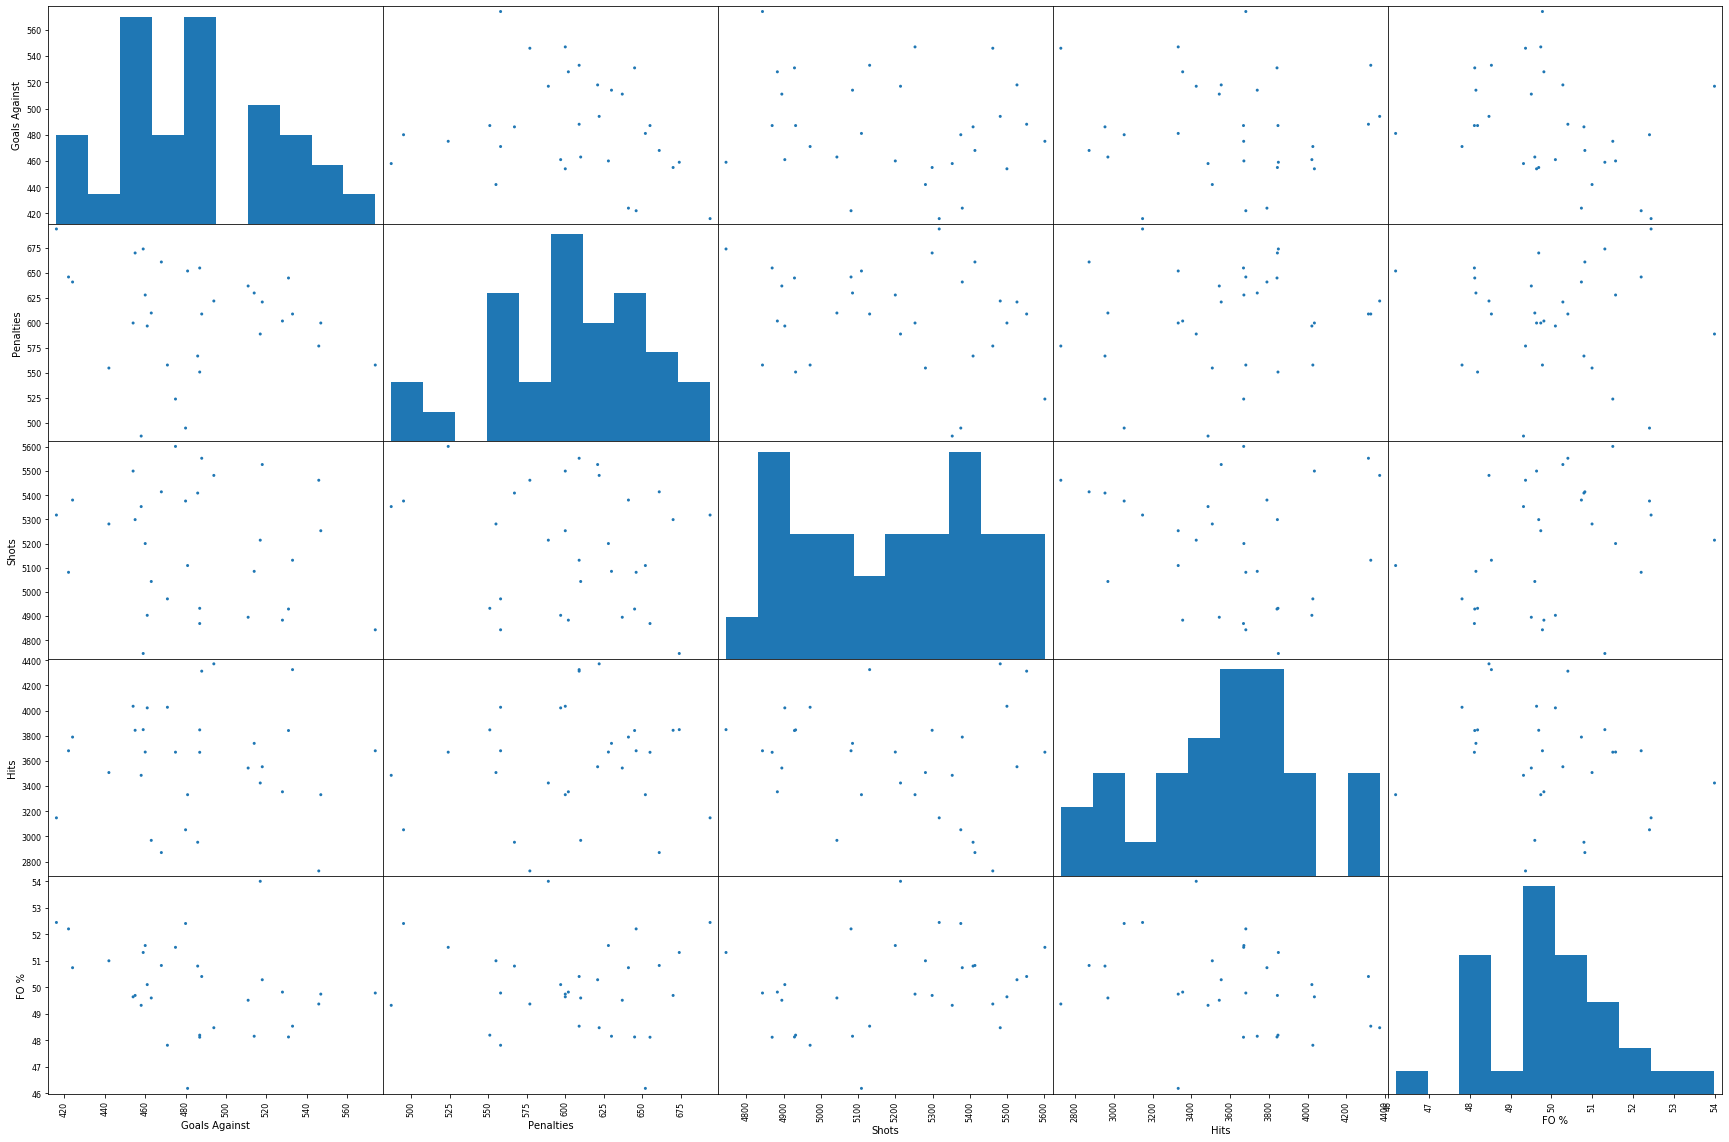

In [22]:
# visualize data with scatter matrix to show distribution of variables plus scatterplot with every variable pairing
# define the plot
pd.plotting.scatter_matrix(team_data, alpha = 1, figsize = (30, 20))

# show the plot
plt.show()

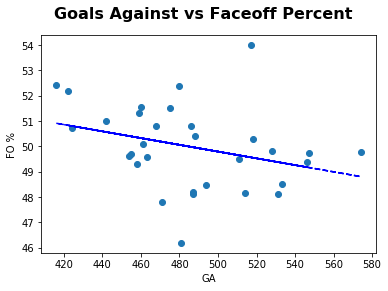

In [23]:
# regress fo% against GA
(slope, intercept, _, _, _) = linregress(team_data['Goals Against'], team_data['FO %'])
fit = slope * team_data['Goals Against'] + intercept

# Plot data
fig, ax = plt.subplots()

fig.suptitle("Goals Against vs Faceoff Percent", fontsize=16, fontweight="bold")

ax.set_xlabel("GA")
ax.set_ylabel("FO %")

ax.plot(team_data['Goals Against'], team_data['FO %'], linewidth=0, marker='o')
ax.plot(team_data['Goals Against'], fit, 'b--')

plt.show()

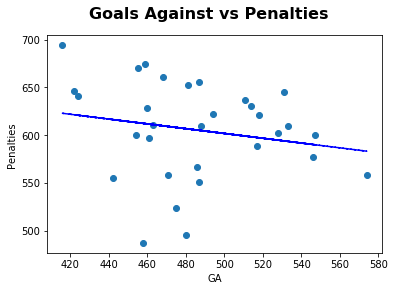

In [24]:
# regress Penalties against GA
(slope, intercept, _, _, _) = linregress(team_data['Goals Against'], team_data['Penalties'])
fit = slope * team_data['Goals Against'] + intercept

# Plot data
fig, ax = plt.subplots()

fig.suptitle("Goals Against vs Penalties", fontsize=16, fontweight="bold")

ax.set_xlabel("GA")
ax.set_ylabel("Penalties")

ax.plot(team_data['Goals Against'], team_data['Penalties'], linewidth=0, marker='o')
ax.plot(team_data['Goals Against'], fit, 'b--')

plt.show()

In [25]:
# get the summary of data
desc_df = team_data.describe()
desc_df

,Goals Against,Penalties,Shots,Hits,FO %
count,31.000000,31.000000,31.000000,31.000000,31.000000
mean,485.483871,605.290323,5194.903226,3601.225806,49.986587
std,38.881762,50.705814,246.887202,423.514715,1.647786
min,416.000000,487.000000,4745.000000,2726.000000,46.181593
25%,459.500000,572.000000,4951.500000,3343.500000,48.923020
50%,481.000000,609.000000,5214.000000,3670.000000,49.780702
75%,515.500000,643.000000,5394.500000,3845.500000,50.908653
max,574.000000,694.000000,5602.000000,4372.000000,53.997923


In [26]:
# remove outliers
# filter the data frame to remove the values exceeding 3 standard deviations
team_remove_data = team_data[(np.abs(stats.zscore(team_data)) < 3).all(axis=1)]

# what rows were removed
team_data.index.difference(team_remove_data.index)

Index([], dtype='object', name='Team Name')

In [27]:
# build the model
# define our input variable (X) & output variable (Y)
# input contains explanatory variables and output contains goals against (GA)
X = team_data.drop('Goals Against', axis = 1)
Y = team_data[['Goals Against']]

# Split X and y into X_
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=1)

# create a Linear Regression model object
regression_model = LinearRegression()

# pass through the X_train & y_train data set
regression_model.fit(X_train, y_train)

# define our intput
X2 = sm.add_constant(X)

# create a OLS model
model = sm.OLS(Y, X2)

# fit the data
est = model.fit()

print(est.summary())

#adjusted r squared indicated the percentage that variables in our model contribute to overall variablity (e.g., 63% indeicates 47% is unexplained)

                            OLS Regression Results                            
Dep. Variable:          Goals Against   R-squared:                       0.179
Model:                            OLS   Adj. R-squared:                  0.053
Method:                 Least Squares   F-statistic:                     1.421
Date:                Mon, 28 Oct 2019   Prob (F-statistic):              0.255
Time:                        19:30:20   Log-Likelihood:                -153.89
No. Observations:                  31   AIC:                             317.8
Df Residuals:                      26   BIC:                             325.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1140.5241    282.057      4.044      0.0

C:\Users\jvanzalk\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [28]:
# print the p-values
est.pvalues

const        0.000417
Penalties    0.206203
Shots        0.408676
Hits         0.523347
FO %         0.109524
dtype: float64